In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy.stats import pearsonr
import re

In [30]:
hospitals = pd.read_csv('../data/hospital_data_clean.csv', dtype={'facility_id': object, 'zip': object})

In [31]:
# Drop hospitals with less than 15 discharges and patient revenue reporting anomalies.
hospitals = hospitals.loc[(hospitals['total_discharges_for_adults_and_peds'] >= 15)]

In [32]:
hospitals

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,doctor_communication,staff_responsiveness,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct
0,390049,ST. LUKES HOSPITAL,801 OSTRUM STREET,BETHLEHEM,PA,18015,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,92.0,82.0,75.0,88.0,82.0,90.0,80.0,90.0,90.0,21.0
1,310119,UH - UNIVERSITY HOSPITAL,150 BERGEN STREET,NEWARK,NJ,07103,Urban,Short-term Hospitals,General Short Term,Governmental - State,...,88.0,72.0,67.0,78.0,75.0,77.0,76.0,82.0,79.0,8.0
2,030115,BANNER ESTRELLA MEDICAL CENTER,9201 WEST THOMAS ROAD,PHOENIX,AZ,85037,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,90.0,82.0,75.0,86.0,80.0,86.0,86.0,89.0,88.0,22.0
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,91.0,82.0,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0
4,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SW,ROCHESTER,MN,55905,Rural,Short-term Hospitals,General Short Term,Governmental - City,...,93.0,89.0,81.0,91.0,86.0,89.0,88.0,94.0,95.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,360180,CLEVELAND CLINIC HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,44195,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,92.0,82.0,75.0,88.0,83.0,88.0,77.0,90.0,92.0,24.0
4510,520019,ASPIRUS RHINELANDER HOSPITAL,2251 NORTH SHORE DRIVE,RHINELANDER,WI,54501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Church,...,89.0,85.0,77.0,91.0,80.0,88.0,79.0,86.0,84.0,17.0
4511,020026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DRIVE,ANCHORAGE,AK,99508,Urban,Short-term Hospitals,General Short Term,Governmental - Federal,...,90.0,83.0,83.0,87.0,81.0,86.0,77.0,86.0,86.0,9.0
4512,490021,CENTRA HEALTH,1920 ATHERHOLT ROAD,LYNCHBURG,VA,24501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,91.0,78.0,73.0,85.0,79.0,82.0,80.0,86.0,85.0,22.0


In [33]:
hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4469 entries, 0 to 4513
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   facility_id                            4469 non-null   object 
 1   name                                   4469 non-null   object 
 2   address                                4467 non-null   object 
 3   city                                   4469 non-null   object 
 4   state                                  4469 non-null   object 
 5   zip                                    4469 non-null   object 
 6   rural_or_urban                         4469 non-null   object 
 7   facility_type                          4469 non-null   object 
 8   provider_type                          4469 non-null   object 
 9   type_of_control                        4469 non-null   object 
 10  total_discharges_for_adults_and_peds   4469 non-null   float64
 11  total_cos

In [34]:
hospitals.value_counts('state')

state
TX    365
CA    318
FL    177
IL    166
PA    156
OH    153
NY    145
MI    127
KS    127
WI    126
GA    126
MN    123
IN    114
IA    112
OK    111
LA    104
NC    104
MO    101
TN     92
KY     89
WA     87
NE     87
CO     86
AL     86
VA     83
MS     83
AZ     77
AR     71
NJ     63
MA     59
SD     57
OR     57
MT     56
SC     54
PR     48
UT     46
WV     46
MD     44
ND     43
ID     42
NM     36
NV     33
ME     31
CT     28
WY     26
NH     26
AK     21
HI     14
VT     14
RI     10
DE      7
DC      7
VI      2
GU      2
MP      1
Name: count, dtype: int64

In [35]:
hospitals.value_counts('rural_or_urban')

rural_or_urban
Rural    2400
Urban    2069
Name: count, dtype: int64

In [36]:
hospitals.value_counts('ruca_desc')

ruca_desc
Metropolitan area core: primary flow within an urbanized area of 50,000 and greater                     2084
Micropolitan area core: primary flow within an urban cluster of 10,000 to 49,999                         491
Small town core: primary flow within an urban cluster of 2,500 to 9,999                                  191
Metropolitan area high commuting: primary flow 30% or more to a urbanized area of 50,000 and greater     105
Secondary flow 30% to <50% to a urbanized area of 50,000 and greater                                      97
Rural areas: primary flow to a tract outside a urbanized area of 50,000 and greater or UC                 43
Micropolitan high commuting: primary flow 30% or more to a urban cluster of 10,000 to 49,999              23
Unknown                                                                                                   12
Small town high commuting: primary flow 30% or more to a urban cluster of 2,500 to 9,999                  11
Metropoli

In [37]:
hospitals.value_counts('facility_type').head(3)

facility_type
Short-term Hospitals         3080
Critical Access Hospitals    1317
Children’s Hospitals           64
Name: count, dtype: int64

In [38]:
hospitals.value_counts('provider_type')

provider_type
General Short Term    4404
Children                64
Other                    1
Name: count, dtype: int64

In [39]:
hospitals.value_counts('type_of_control')

type_of_control
Voluntary Non-Profit - Other        2195
Proprietary - Corporation            634
Voluntary Non-Profit - Church        545
Governmental - County                332
Governmental - Hospital District     324
Proprietary - Partnership             81
Governmental - City/County            74
Governmental - Other                  70
Governmental - State                  60
Governmental - City                   57
Proprietary - Other                   51
Governmental - Federal                35
Proprietary - Individual              11
Name: count, dtype: int64

In [40]:
# New column for less specific control type labels.
hospitals.loc[hospitals['type_of_control'].str.contains('Governmental', na=False), 'general_control'] = 'Government'

hospitals.loc[hospitals['type_of_control'].str.contains('Non-Profit', na=False), 'general_control'] = 'Non-Profit'

hospitals.loc[hospitals['type_of_control'].str.contains('Proprietary', na=False), 'general_control'] = 'Proprietary'

In [41]:
hospitals

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,staff_responsiveness,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct,general_control
0,390049,ST. LUKES HOSPITAL,801 OSTRUM STREET,BETHLEHEM,PA,18015,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,75.0,88.0,82.0,90.0,80.0,90.0,90.0,21.0,Non-Profit
1,310119,UH - UNIVERSITY HOSPITAL,150 BERGEN STREET,NEWARK,NJ,07103,Urban,Short-term Hospitals,General Short Term,Governmental - State,...,72.0,67.0,78.0,75.0,77.0,76.0,82.0,79.0,8.0,Government
2,030115,BANNER ESTRELLA MEDICAL CENTER,9201 WEST THOMAS ROAD,PHOENIX,AZ,85037,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,75.0,86.0,80.0,86.0,86.0,89.0,88.0,22.0,Non-Profit
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0,Non-Profit
4,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SW,ROCHESTER,MN,55905,Rural,Short-term Hospitals,General Short Term,Governmental - City,...,89.0,81.0,91.0,86.0,89.0,88.0,94.0,95.0,34.0,Government
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,360180,CLEVELAND CLINIC HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,44195,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,75.0,88.0,83.0,88.0,77.0,90.0,92.0,24.0,Non-Profit
4510,520019,ASPIRUS RHINELANDER HOSPITAL,2251 NORTH SHORE DRIVE,RHINELANDER,WI,54501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Church,...,85.0,77.0,91.0,80.0,88.0,79.0,86.0,84.0,17.0,Non-Profit
4511,020026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DRIVE,ANCHORAGE,AK,99508,Urban,Short-term Hospitals,General Short Term,Governmental - Federal,...,83.0,83.0,87.0,81.0,86.0,77.0,86.0,86.0,9.0,Government
4512,490021,CENTRA HEALTH,1920 ATHERHOLT ROAD,LYNCHBURG,VA,24501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,78.0,73.0,85.0,79.0,82.0,80.0,86.0,85.0,22.0,Non-Profit


In [42]:
hospitals.value_counts('general_control')

general_control
Non-Profit     2740
Government      952
Proprietary     777
Name: count, dtype: int64

In [43]:
hospitals.sort_values('total_discharges_for_adults_and_peds', ascending = False) 

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,staff_responsiveness,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct,general_control
2057,100007,ADVENTHEALTH ORLANDO,601 E ROLLINS ST,ORLANDO,FL,32803,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,81.0,76.0,88.0,82.0,89.0,86.0,89.0,89.0,15.0,Non-Profit
474,330101,NEW YORK PRESBYTERIAN HOSPITAL,525 EAST 68TH STREET,NEW YORK,NY,10065,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,79.0,75.0,86.0,80.0,84.0,76.0,88.0,88.0,14.0,Non-Profit
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,82.0,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0,Non-Profit
9,450388,METHODIST HOSPITAL,7700 FLOYD CURL DRIVE,SAN ANTONIO,TX,78229,Rural,Short-term Hospitals,General Short Term,Proprietary - Partnership,...,81.0,73.0,83.0,80.0,86.0,83.0,87.0,86.0,15.0,Proprietary
4500,100006,ORLANDO HEALTH,52 W. UNDERWOOD ST,ORLANDO,FL,32806,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,81.0,74.0,85.0,81.0,86.0,84.0,88.0,88.0,15.0,Non-Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,271303,GRANITE COUNTY MEDICAL CENTER,310 SANSOME STREET,PHILIPSBURG,MT,59858,Rural,Critical Access Hospitals,General Short Term,Governmental - Hospital District,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Government
1436,230078,LAKELAND COMMUNITY HOSP WATERVLIET,400 MEDICAL PARK DRIVE,WATERVLIET,MI,49098,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Profit
1533,451322,GRIMES ST. JOSEPH HEALTH CENTER,210 JUDSON,NAVASOTA,TX,77868,Rural,Critical Access Hospitals,General Short Term,Voluntary Non-Profit - Church,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Profit
2674,271307,BENEFIS TETON MEDICAL CENTER,915 FOURTH STREET NW,CHOTEAU,MT,59422,Rural,Critical Access Hospitals,General Short Term,Governmental - County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Government


(array([1.825e+03, 4.480e+02, 3.080e+02, 2.380e+02, 2.170e+02, 1.930e+02,
        1.480e+02, 1.590e+02, 1.260e+02, 1.050e+02, 1.060e+02, 7.800e+01,
        6.400e+01, 7.000e+01, 3.800e+01, 3.900e+01, 3.500e+01, 3.200e+01,
        2.400e+01, 3.100e+01, 1.700e+01, 2.300e+01, 2.100e+01, 2.100e+01,
        1.000e+01, 1.700e+01, 7.000e+00, 7.000e+00, 1.000e+01, 4.000e+00,
        3.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 5.000e+00,
        3.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

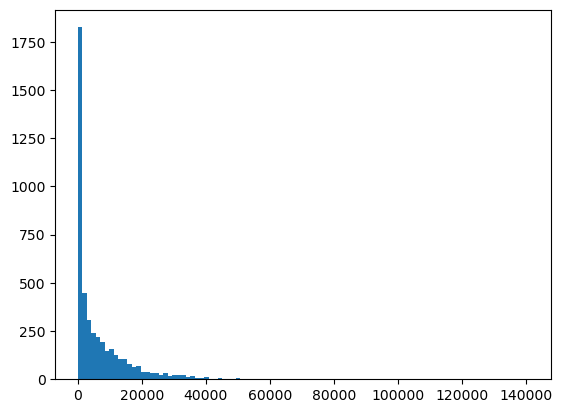

In [44]:
plt.hist(hospitals['total_discharges_for_adults_and_peds'], bins=100)

In [45]:
# New column for discharge bin labels.
hospitals.loc[hospitals['total_discharges_for_adults_and_peds']<500 , 'size'] = 'Very Small'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=500) & (hospitals['total_discharges_for_adults_and_peds']<2000), 'size'] = 'Small'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=2000) & (hospitals['total_discharges_for_adults_and_peds']<5000), 'size'] = 'Somewhat Small'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=5000) & (hospitals['total_discharges_for_adults_and_peds']<10000), 'size'] = 'Medium'

hospitals.loc[(hospitals['total_discharges_for_adults_and_peds']>=10000) & (hospitals['total_discharges_for_adults_and_peds']<50000), 'size'] = 'Large'

hospitals.loc[hospitals['total_discharges_for_adults_and_peds']>=50000 , 'size'] = 'Very Large'

In [46]:
hospitals

,facility_id,name,address,city,state,zip,rural_or_urban,facility_type,provider_type,type_of_control,...,communication_about_medicines,discharge_information,care_transition,cleanliness,quietness,overall_hospital_rating,recommend_hospital,response_rate_pct,general_control,size
0,390049,ST. LUKES HOSPITAL,801 OSTRUM STREET,BETHLEHEM,PA,18015,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,75.0,88.0,82.0,90.0,80.0,90.0,90.0,21.0,Non-Profit,Large
1,310119,UH - UNIVERSITY HOSPITAL,150 BERGEN STREET,NEWARK,NJ,07103,Urban,Short-term Hospitals,General Short Term,Governmental - State,...,67.0,78.0,75.0,77.0,76.0,82.0,79.0,8.0,Government,Large
2,030115,BANNER ESTRELLA MEDICAL CENTER,9201 WEST THOMAS ROAD,PHOENIX,AZ,85037,Urban,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,75.0,86.0,80.0,86.0,86.0,89.0,88.0,22.0,Non-Profit,Large
3,330214,NYU LANGONE HOSPITALS,550 FIRST AVENUE,NEW YORK,NY,10016,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,77.0,86.0,82.0,86.0,76.0,89.0,89.0,19.0,Non-Profit,Very Large
4,240010,MAYO CLINIC HOSPITAL ROCHESTER,1216 SECOND STREET SW,ROCHESTER,MN,55905,Rural,Short-term Hospitals,General Short Term,Governmental - City,...,81.0,91.0,86.0,89.0,88.0,94.0,95.0,34.0,Government,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,360180,CLEVELAND CLINIC HOSPITAL,9500 EUCLID AVENUE,CLEVELAND,OH,44195,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,75.0,88.0,83.0,88.0,77.0,90.0,92.0,24.0,Non-Profit,Very Large
4510,520019,ASPIRUS RHINELANDER HOSPITAL,2251 NORTH SHORE DRIVE,RHINELANDER,WI,54501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Church,...,77.0,91.0,80.0,88.0,79.0,86.0,84.0,17.0,Non-Profit,Somewhat Small
4511,020026,ALASKA NATIVE MEDICAL CENTER,4315 DIPLOMACY DRIVE,ANCHORAGE,AK,99508,Urban,Short-term Hospitals,General Short Term,Governmental - Federal,...,83.0,87.0,81.0,86.0,77.0,86.0,86.0,9.0,Government,Medium
4512,490021,CENTRA HEALTH,1920 ATHERHOLT ROAD,LYNCHBURG,VA,24501,Rural,Short-term Hospitals,General Short Term,Voluntary Non-Profit - Other,...,73.0,85.0,79.0,82.0,80.0,86.0,85.0,22.0,Non-Profit,Large


In [47]:
hospitals.value_counts('size')

size
Very Small        1137
Large             1043
Small              912
Medium             679
Somewhat Small     670
Very Large          28
Name: count, dtype: int64

In [48]:
hospitals['avg_charge_pct'] = round(hospitals['charges_per_discharge'] / hospitals['costs_per_discharge'] * 100, 2)

In [49]:
hospitals = hospitals.rename(columns={'charge_pct': 'total_charge_pct'})

In [50]:
hospitals.to_csv('../data/hospitals_final.csv', index=False) 

### Core Question 1: Financial Performance vs. Quality

This directly tests the central hypothesis using the financial metrics against the clinical outcomes and patient rating.

In [52]:
# 1. Calculate Correlation Coefficients (Primary Hypothesis Test)
print("--- Correlation: Financial Margin vs. Quality Scores ---")
# Use Pearson correlation between financial information and key quality scores
correlation_df = hospitals[['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct', 'mortality_score', 'readmission_score', 'overall_hospital_rating']]

# Correlation Matrix
corr_matrix = correlation_df.corr()
print(corr_matrix[['mortality_score', 'readmission_score', 'overall_hospital_rating']])

# Example Interpretation:
# A negative correlation between service_margin and mortality_score would suggest
# that hospitals with higher financial margins from patient services tend to have *lower* mortality rates.


--- Correlation: Financial Margin vs. Quality Scores ---
                         mortality_score  readmission_score  \
costs_per_discharge             0.067879          -0.054880   
charges_per_discharge          -0.060680          -0.035784   
avg_charge_pct                 -0.137296           0.145713   
mortality_score                 1.000000           0.205212   
readmission_score               0.205212           1.000000   
overall_hospital_rating        -0.077626          -0.265703   

                         overall_hospital_rating  
costs_per_discharge                     0.288265  
charges_per_discharge                   0.123899  
avg_charge_pct                         -0.286973  
mortality_score                        -0.077626  
readmission_score                      -0.265703  
overall_hospital_rating                 1.000000  


### Core Question 2: Hospital Size & Type vs. Costs & Quality

This leverages created categorical columns (general_control and discharges) to identify structural differences.

In [61]:
# 2. Analyze Costs and Quality by Area
area_summary = hospitals.groupby('rural_or_urban').agg(
    median_charge_pct_per_discharge=('avg_charge_pct', 'median'),
    median_service_margin=('service_margin', 'median'),
    median_cost_per_discharge=('costs_per_discharge', 'median'),
    median_charge_per_discharge=('charges_per_discharge', 'median'),
    median_mortality_score=('mortality_score', 'median'),
    median_readmission_score=('readmission_score', 'median'),
    median_overall_rating=('overall_hospital_rating', 'median'),
    count=('facility_id', 'count')
).sort_values(by='median_charge_pct_per_discharge', ascending=False)

print("\n--- Summary by Hospital Area (Rural or Urban) ---")
print(area_summary)

# 3. Analyze Costs and Quality by Hospital Size (Discharge Bins)
size_summary = hospitals.groupby('size').agg(
    median_charge_pct_per_discharge=('avg_charge_pct', 'median'),
    median_service_margin=('service_margin', 'median'),
    median_cost_per_discharge=('costs_per_discharge', 'median'),
    median_charge_per_discharge=('charges_per_discharge', 'median'),
    median_mortality_score=('mortality_score', 'median'),
    median_readmission_score=('readmission_score', 'median'),
    median_overall_rating=('overall_hospital_rating', 'median'),
    count=('facility_id', 'count')
).reindex(['Very Small', 'Small', 'Somewhat Small', 'Medium', 'Large', 'Very Large'])

print("\n--- Summary by Hospital Size ---")
print(size_summary)

# 4. Analyze Costs and Quality by Hospital Ownership Type
ownership_summary = hospitals.groupby('general_control').agg(
    median_charge_pct_per_discharge=('avg_charge_pct', 'median'),
    median_cost_per_discharge=('costs_per_discharge', 'median'),
    median_charge_per_discharge=('charges_per_discharge', 'median'),
    median_mortality_score=('mortality_score', 'median'),
    median_readmission_score=('readmission_score', 'median'),
    median_overall_rating=('overall_hospital_rating', 'median'),
    count=('facility_id', 'count')
).sort_values(by='median_charge_pct_per_discharge', ascending=False)

print("\n--- Summary by Hospital Ownership Type (General Control) ---")
print(ownership_summary)




--- Summary by Hospital Area (Rural or Urban) ---
                median_charge_pct_per_discharge  median_service_margin  \
rural_or_urban                                                           
Urban                                   445.930                  -2.67   
Rural                                   261.865                  -6.75   

                median_cost_per_discharge  median_charge_per_discharge  \
rural_or_urban                                                           
Urban                            30547.77                   152598.300   
Rural                            54217.50                   153598.285   

                median_mortality_score  median_readmission_score  \
rural_or_urban                                                     
Urban                              4.1                      15.0   
Rural                              4.3                      14.9   

                median_overall_rating  count  
rural_or_urban                     

In [62]:
hospital_types = hospitals.loc[hospitals['facility_type'] != 'Reserved for hospitals participating in ORD demonstration project']

In [63]:
# 5. Analyze Costs and Quality by Facility Type 
facility_summary = hospital_types.groupby('facility_type').agg(
    median_charge_pct_per_discharge=('avg_charge_pct', 'median'),
    median_service_margin=('service_margin', 'median'),
    median_cost_per_discharge=('costs_per_discharge', 'median'),
    median_charge_per_discharge=('charges_per_discharge', 'median'),
    median_mortality_score=('mortality_score', 'median'),
    median_readmission_score=('readmission_score', 'median'),
    median_overall_rating=('overall_hospital_rating', 'median'),
    count=('facility_id', 'count')
).sort_values(by='median_charge_pct_per_discharge', ascending=False)

print("\n--- Summary by Facility Type ---")
print(facility_summary)


--- Summary by Facility Type ---
                           median_charge_pct_per_discharge  \
facility_type                                                
Short-term Hospitals                                431.43   
Children’s Hospitals                                305.22   
Critical Access Hospitals                           180.58   

                           median_service_margin  median_cost_per_discharge  \
facility_type                                                                 
Short-term Hospitals                      -4.295                  31195.595   
Children’s Hospitals                      -0.350                  65684.620   
Critical Access Hospitals                 -6.760                  92559.980   

                           median_charge_per_discharge  \
facility_type                                            
Short-term Hospitals                         145431.16   
Children’s Hospitals                         222427.24   
Critical Access Hospitals  

### Core Question 3: Patient Satisfaction vs. Other Metrics

This explores the HCAHPS data and its relationship with clinical outcomes and financials.

In [64]:
# 6. Correlation: Patient Experience vs. Clinical/Financial
satisfaction_metrics = ['overall_hospital_rating', 'nurse_communication', 'doctor_communication', 'staff_responsiveness',	'discharge_information', 'care_transition',	'cleanliness', 'quietness', 'recommend_hospital']
clinical_financial_metrics = ['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct', 'mortality_score', 'readmission_score']

print("\n--- Correlation: Patient Satisfaction vs. Clinical/Financial ---")
satisfaction_corr = hospitals[satisfaction_metrics + clinical_financial_metrics].corr()
# Show how the key HCAHPS measures correlate with the other metrics
print(satisfaction_corr.loc[satisfaction_metrics, clinical_financial_metrics])

# 7. Top Analysis (For High-Impact Visuals)
# Example: Find the hospitals that excel in both rating and quality
top_hospitals = hospitals.nlargest(10, ['overall_hospital_rating']) 
bottom_hospitals = hospitals.nsmallest(10, ['mortality_score']) # Lowest is best

print("\n--- Top 10 Hospitals by Patient Rating ---")
print(top_hospitals[['name', 'state', 'overall_hospital_rating', 'avg_charge_pct', 'mortality_score', 'readmission_score']])

print("\n--- Top 10 Hospitals by Mortality Score (Lower is Better) ---")
print(bottom_hospitals[['name', 'state', 'mortality_score', 'readmission_score', 'overall_hospital_rating', 'avg_charge_pct',]])


--- Correlation: Patient Satisfaction vs. Clinical/Financial ---
                         costs_per_discharge  charges_per_discharge  \
overall_hospital_rating             0.288265               0.123899   
nurse_communication                 0.297067               0.112946   
doctor_communication                0.285329               0.048412   
staff_responsiveness                0.323460               0.127353   
discharge_information               0.308911               0.099232   
care_transition                     0.325328               0.143935   
cleanliness                         0.236203               0.106538   
quietness                           0.166181               0.081141   
recommend_hospital                  0.277038               0.128569   

                         avg_charge_pct  mortality_score  readmission_score  
overall_hospital_rating       -0.286973        -0.077626          -0.265703  
nurse_communication           -0.302504         0.031780          -

In [65]:
# Set global style
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'figure.figsize': (8, 5),
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    "font.family": "sans-serif",
    "font.sans-serif": "Verdana"
})

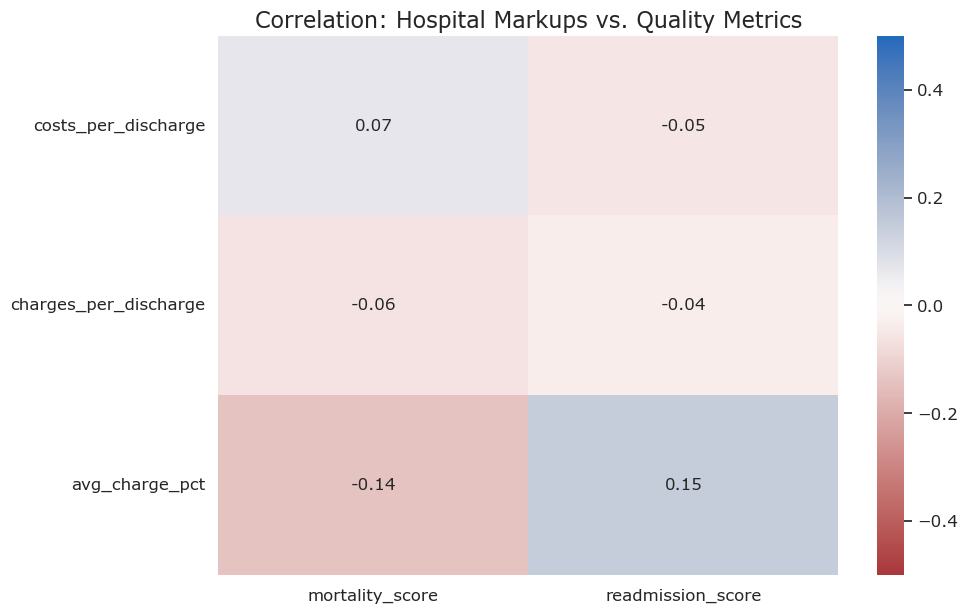

In [66]:
# Heatmap for correlation of costs, charges, and average markup percentage vs mortality, readmission, and overall hospital rating from patient satisfaction survey.
corr_data = hospitals[['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct', 'mortality_score', 'readmission_score']].corr()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_data.loc[['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct'],['mortality_score', 'readmission_score']], 
    annot=True,     # Show the numbers
    cmap='vlag_r',    # Use a diverging colormap (red/blue)
    fmt='.2f',      # Format to 2 decimal places
    vmin=-0.5,      # Set min/max for color consistency
    vmax=0.5
)
plt.title('Correlation: Hospital Markups vs. Quality Metrics', fontsize=16)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.savefig('../visualizations/corrheatmap-markup_v_quality.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

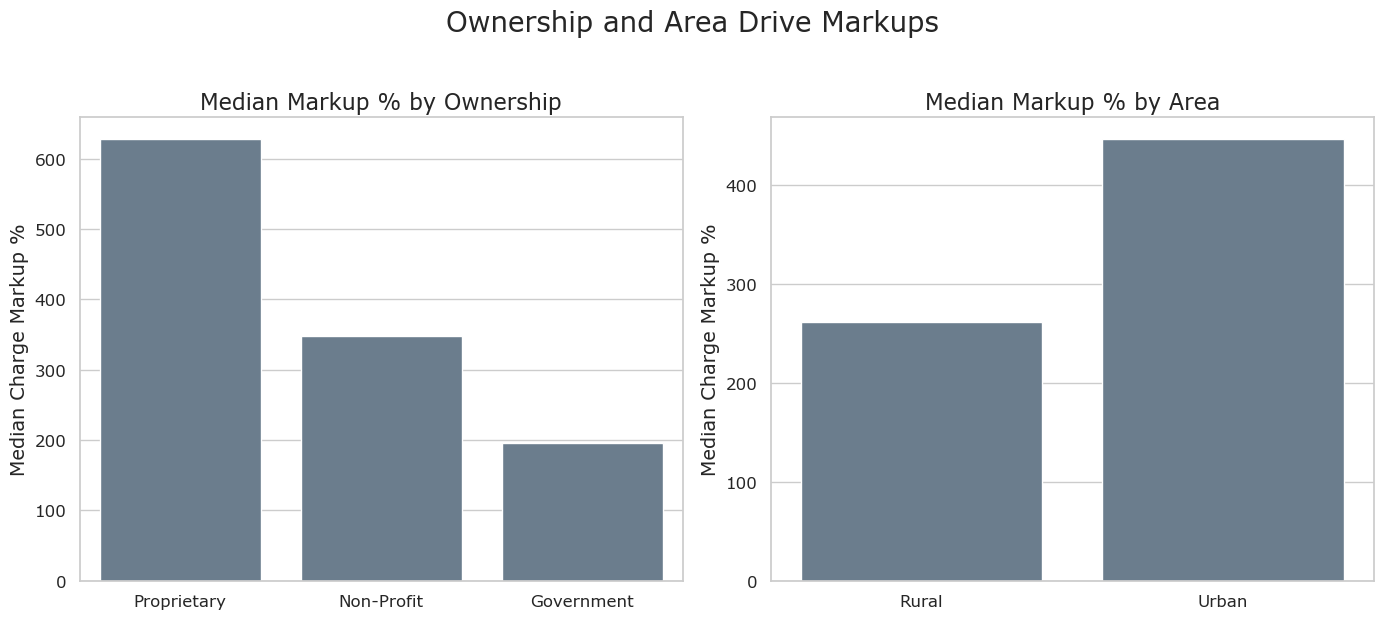

In [71]:


fig, axes = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 charts

# Chart 1: Ownership Markup %
sns.barplot(
    data=ownership_summary.reset_index(), 
    x='general_control', 
    y='median_charge_pct_per_discharge',
    ax=axes[0],
    color='#657e93',
    order=['Proprietary', 'Non-Profit', 'Government'] # Control order
)
axes[0].set_title('Median Markup % by Ownership', fontsize=16)
axes[0].set_xlabel('')
axes[0].set_ylabel('Median Charge Markup %')

# Chart 2: Area Markup %
sns.barplot(
    data=area_summary.reset_index(), 
    x='rural_or_urban', 
    y='median_charge_pct_per_discharge',
    ax=axes[1],
    color='#657e93',
    order=['Rural', 'Urban']  # Control order
)
axes[1].set_title('Median Markup % by Area', fontsize=16)
axes[1].set_xlabel('')
axes[1].set_ylabel('Median Charge Markup %')

plt.suptitle('Ownership and Area Drive Markups', fontsize=20, y=1.03)
plt.tight_layout()
plt.savefig('../visualizations/ownershipbarcharts.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

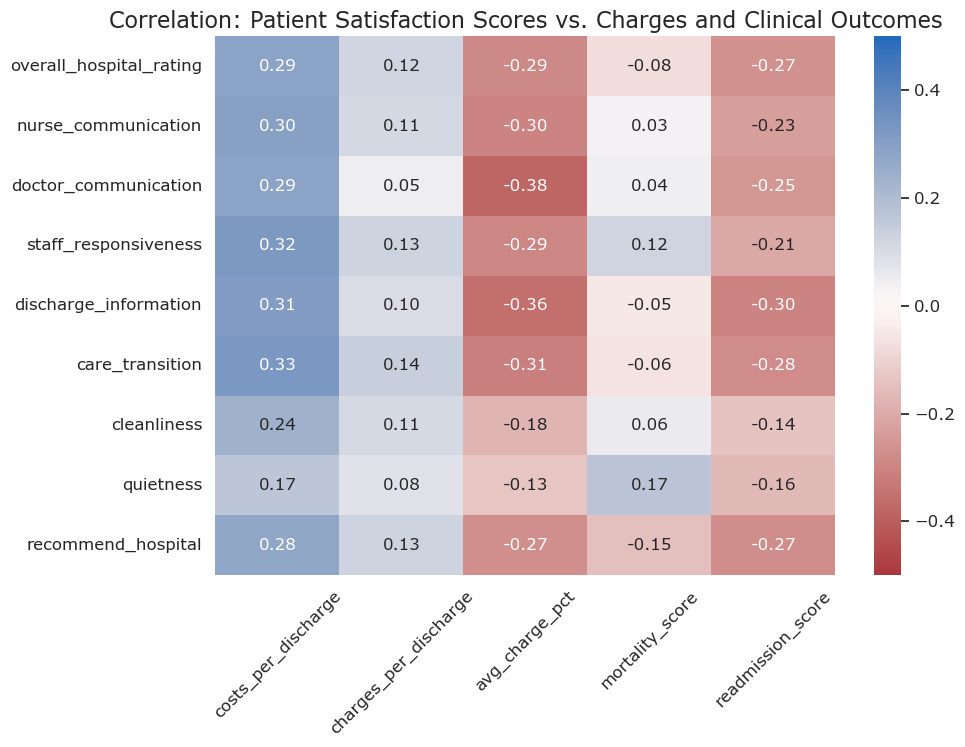

In [72]:
# Heatmap for correlation of patient satisfaction survey categories vs costs, charges, and clinical outcomes. 
corr_data = hospitals[satisfaction_metrics + clinical_financial_metrics].corr()

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_data.loc[satisfaction_metrics, clinical_financial_metrics], 
    annot=True,     # Show the numbers
    cmap='vlag_r',    # Use a diverging colormap (red/blue)
    fmt='.2f',      # Format to 2 decimal places
    vmin=-0.5,      # Set min/max for color consistency
    vmax=0.5
)
plt.title('Correlation: Patient Satisfaction Scores vs. Charges and Clinical Outcomes', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig('../visualizations/corrheatmap-ratings_v_cost&quality.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

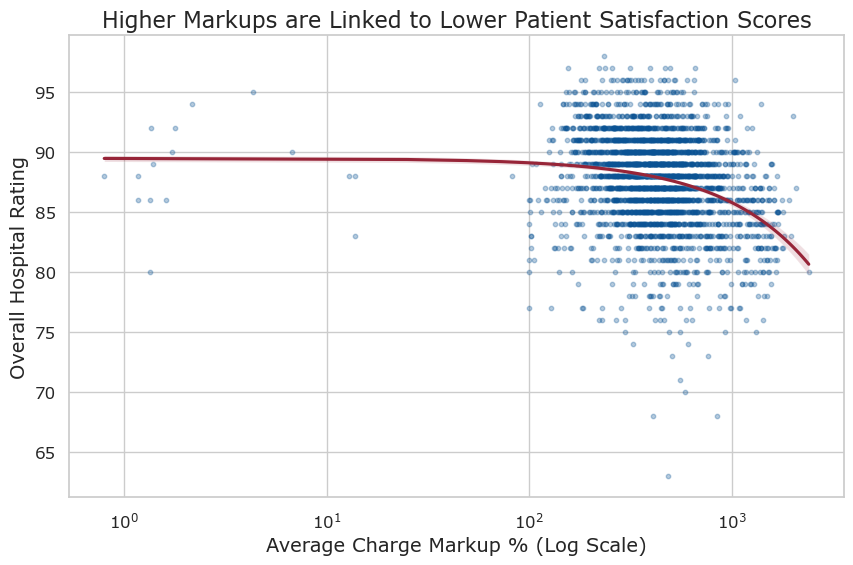

In [73]:
# Use a regplot to show the trendline and confidence interval
# Log-scale x for readability, as markup is highly skewed
plt.figure(figsize=(10, 6))

g = sns.regplot(
    data=hospitals, 
    x='avg_charge_pct', 
    y='overall_hospital_rating',
    line_kws={"color": "#972538"},
    scatter_kws={'alpha': 0.3, 's': 10, 'color': '#0b5394'} # Make points transparent
)
g.set(xscale="log") # Apply log scale to x-axis
g.set_title('Higher Markups are Linked to Lower Patient Satisfaction Scores', fontsize=16)
g.set_xlabel('Average Charge Markup % (Log Scale)')
g.set_ylabel('Overall Hospital Rating')
plt.savefig('../visualizations/regplot-markup_v_rating.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

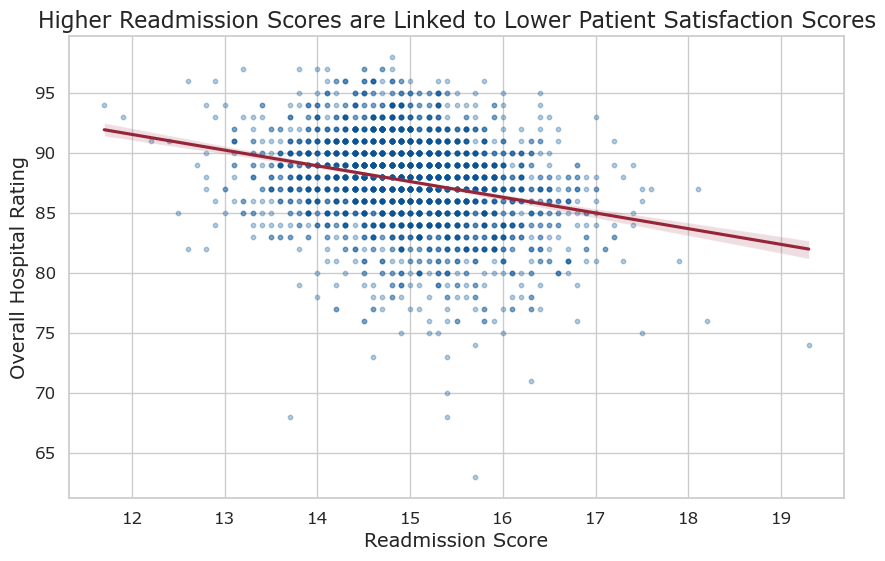

In [74]:
# Regplot to show the trendline and confidence interval
plt.figure(figsize=(10, 6))

g = sns.regplot(
    data=hospitals, 
    x='readmission_score', 
    y='overall_hospital_rating',
    line_kws={'color': '#972538'},
    scatter_kws={'alpha': 0.3, 's': 10, 'color': '#0b5394'} # Make points transparent
)
g.set_title('Higher Readmission Scores are Linked to Lower Patient Satisfaction Scores', fontsize=16)
g.set_xlabel('Readmission Score')
g.set_ylabel('Overall Hospital Rating')
plt.savefig('../visualizations/regplot-readmission_v_rating.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

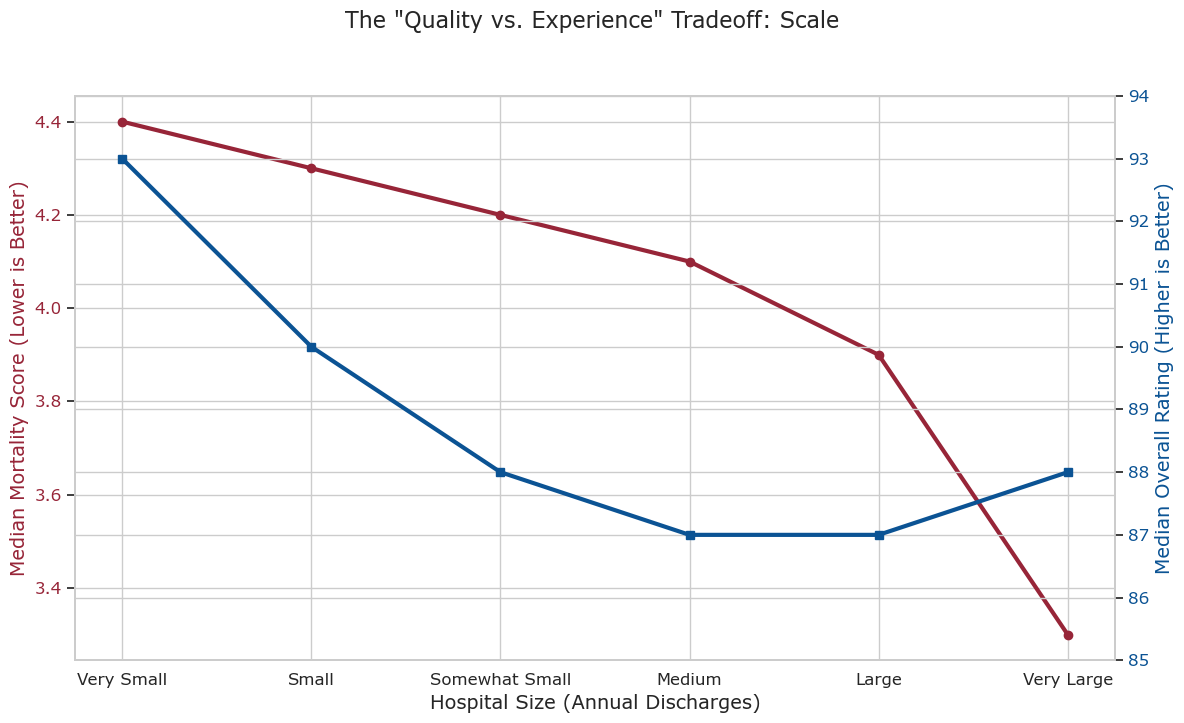

In [75]:
fig, ax1 = plt.subplots(figsize=(12, 7))

# X-axis (shared)
x = size_summary.index

# Y-axis 1 (Left): Mortality
color = '#972538'
ax1.set_xlabel('Hospital Size (Annual Discharges)', fontsize=14)
ax1.set_ylabel('Median Mortality Score (Lower is Better)', color=color, fontsize=14)
ax1.plot(x, size_summary['median_mortality_score'], color=color, marker='o', linewidth=3, label='Mortality Score')
ax1.tick_params(axis='y', labelcolor=color)

# Y-axis 2 (Right): Rating
ax2 = ax1.twinx() # Create a second y-axis
color = '#0b5394'
ax2.set_ylabel('Median Overall Rating (Higher is Better)', color=color, fontsize=14)
ax2.plot(x, size_summary['median_overall_rating'], color=color, marker='s', linewidth=3, label='Overall Rating')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(85, 94) # Set Y-axis to emphasize the peak

fig.suptitle('The "Quality vs. Experience" Tradeoff: Scale', fontsize=16, y=1.03)
fig.tight_layout()
plt.savefig('../visualizations/mortality_v_rating.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [76]:
# Get the data for each group
proprietary_markups = hospitals[hospitals['general_control'] == 'Proprietary']['avg_charge_pct'].dropna()
non_profit_markups = hospitals[hospitals['general_control'] == 'Non-Profit']['avg_charge_pct'].dropna()
government_markups = hospitals[hospitals['general_control'] == 'Government']['avg_charge_pct'].dropna()

# Run the ANOVA
f_stat, p_value = stats.f_oneway(proprietary_markups, non_profit_markups, government_markups)

print(f"ANOVA P-Value: {p_value}")

ANOVA P-Value: 0.0


In [79]:
# Get the data for each group
rural_markups = hospitals[hospitals['rural_or_urban'] == 'Rural']['avg_charge_pct'].dropna()
urban_markups = hospitals[hospitals['rural_or_urban'] == 'Urban']['avg_charge_pct'].dropna()

# Run the ANOVA
f_stat, p_value = stats.f_oneway(rural_markups, urban_markups)

print(f"ANOVA P-Value: {p_value}")

ANOVA P-Value: 2.0392808787762266e-126


In [80]:
#Predictive Analysis: Overall Patient Rating Regression Model

X = hospitals[['avg_charge_pct', 'mortality_score', 'readmission_score', 'total_discharges_for_adults_and_peds']]

X = sm.add_constant(X)

y = hospitals['overall_hospital_rating']


model = sm.OLS(y, X, missing='drop').fit()

print(model.summary()) 

                               OLS Regression Results                              
Dep. Variable:     overall_hospital_rating   R-squared:                       0.148
Model:                                 OLS   Adj. R-squared:                  0.147
Method:                      Least Squares   F-statistic:                     132.4
Date:                     Wed, 12 Nov 2025   Prob (F-statistic):          2.04e-104
Time:                             10:36:36   Log-Likelihood:                -8121.1
No. Observations:                     3045   AIC:                         1.625e+04
Df Residuals:                         3040   BIC:                         1.628e+04
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [81]:
#Predictive Analysis: Charge Markup Percentage Regression Model

X = hospitals[['overall_hospital_rating', 'mortality_score', 'readmission_score', 'total_discharges_for_adults_and_peds']]

X = sm.add_constant(X)

y = hospitals['avg_charge_pct']


model = sm.OLS(y, X, missing='drop').fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         avg_charge_pct   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     91.71
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.02e-73
Time:                        10:36:44   Log-Likelihood:                -21441.
No. Observations:                3045   AIC:                         4.289e+04
Df Residuals:                    3040   BIC:                         4.292e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [82]:

# --- Data Cleaning Check (Must Run to Ensure Numerics are Numeric) ---
# Assuming 'hospitals' is your original DataFrame
model_df = hospitals.copy()

# A. Clean Column Names
def clean_col_name(col):
    col = str(col).lower()
    col = re.sub(r'[^a-z0-9_]+', '', col)
    return col
model_df.columns = [clean_col_name(col) for col in model_df.columns]

# B. Ensure key measurement columns are float, coercing errors to NaN
measurement_cols = [
    'avg_charge_pct', 
    'mortality_score', 
    'readmission_score', 
    'total_discharges_for_adults_and_peds',
    'overall_hospital_rating'
]
for col in measurement_cols:
    # Use the clean column names
    model_df[col] = pd.to_numeric(model_df[col], errors='coerce').astype(float) 

# C. Clean categorical column values to remove stray spaces/unseen characters
categorical_cols = ['general_control', 'rural_or_urban']
for col in categorical_cols:
    model_df[col] = model_df[col].astype(str).str.strip()


# -------------------------------------------------------------------
# OLS MODEL 2: PREDICTING CHARGE MARKUP (The critical result)
# -------------------------------------------------------------------

# Formula uses original column names; C() tells statsmodels they are categorical
formula_markup = (
    'avg_charge_pct ~ overall_hospital_rating + mortality_score + readmission_score + '
    'total_discharges_for_adults_and_peds + C(general_control) + C(rural_or_urban)'
)

# Fit the model using the formula API
model_markup_full_formula = smf.ols(
    formula=formula_markup, 
    data=model_df
).fit()

print("\n--- OLS Model 2: Predicting Charge Markup (Formula API) ---")
print(model_markup_full_formula.summary())


# -------------------------------------------------------------------
# OLS MODEL 1: PREDICTING PATIENT RATING
# -------------------------------------------------------------------

formula_rating = (
    'overall_hospital_rating ~ avg_charge_pct + mortality_score + readmission_score + '
    'total_discharges_for_adults_and_peds + C(general_control) + C(rural_or_urban)'
)

model_rating_full_formula = smf.ols(
    formula=formula_rating, 
    data=model_df
).fit()

print("\n--- OLS Model 1: Predicting Patient Rating (Formula API) ---")
print(model_rating_full_formula.summary())


--- OLS Model 2: Predicting Charge Markup (Formula API) ---
                            OLS Regression Results                            
Dep. Variable:         avg_charge_pct   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     300.7
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        10:36:49   Log-Likelihood:                -20813.
No. Observations:                3045   AIC:                         4.164e+04
Df Residuals:                    3037   BIC:                         4.169e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

In [83]:
# Formula uses 'C()' for categorical variables
formula_mortality = (
    'mortality_score ~ overall_hospital_rating + avg_charge_pct + costs_per_discharge + '
    'total_discharges_for_adults_and_peds + C(general_control) + C(rural_or_urban)'
)

# Fit the model (using the cleaned model_df from our previous successful run)
model_mortality = smf.ols(
    formula=formula_mortality, 
    data=model_df 
).fit()

print("\n--- OLS Model: Predicting Mortality Score ---")
print(model_mortality.summary())


--- OLS Model: Predicting Mortality Score ---
                            OLS Regression Results                            
Dep. Variable:        mortality_score   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     131.6
Date:                Wed, 12 Nov 2025   Prob (F-statistic):          1.25e-169
Time:                        10:36:53   Log-Likelihood:                -2062.0
No. Observations:                3045   AIC:                             4140.
Df Residuals:                    3037   BIC:                             4188.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [84]:
# Formula uses 'C()' for categorical variables
formula_readmission = (
    'readmission_score ~ overall_hospital_rating + avg_charge_pct + costs_per_discharge + '
    'total_discharges_for_adults_and_peds + C(general_control) + C(rural_or_urban)'
)

# Fit the model (using the cleaned model_df)
model_readmission = smf.ols(
    formula=formula_readmission, 
    data=model_df
).fit()

print("\n--- OLS Model: Predicting Readmission Score ---")
print(model_readmission.summary())


--- OLS Model: Predicting Readmission Score ---
                            OLS Regression Results                            
Dep. Variable:      readmission_score   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     43.90
Date:                Wed, 12 Nov 2025   Prob (F-statistic):           1.93e-59
Time:                        10:37:01   Log-Likelihood:                -3364.6
No. Observations:                3046   AIC:                             6745.
Df Residuals:                    3038   BIC:                             6793.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [85]:
metrics = [
    'costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct',
    'mortality_score', 'readmission_score', 'overall_hospital_rating'
]

# Pairwise test: financial vs quality
for x in ['costs_per_discharge', 'charges_per_discharge', 'avg_charge_pct']:
    for y in ['mortality_score', 'readmission_score', 'overall_hospital_rating']:
        clean_df = hospitals[[x, y]].dropna()
        r, p = pearsonr(clean_df[x], clean_df[y])
        print(f"{x} vs {y}: r = {r:.3f}, p = {p:.5f}")


costs_per_discharge vs mortality_score: r = 0.068, p = 0.00002
costs_per_discharge vs readmission_score: r = -0.055, p = 0.00043
costs_per_discharge vs overall_hospital_rating: r = 0.288, p = 0.00000
charges_per_discharge vs mortality_score: r = -0.061, p = 0.00012
charges_per_discharge vs readmission_score: r = -0.036, p = 0.02178
charges_per_discharge vs overall_hospital_rating: r = 0.124, p = 0.00000
avg_charge_pct vs mortality_score: r = -0.137, p = 0.00000
avg_charge_pct vs readmission_score: r = 0.146, p = 0.00000
avg_charge_pct vs overall_hospital_rating: r = -0.287, p = 0.00000
